2) Economia de combustiveis. Em um problema de regressão, o objetivo é prever as saídas (outputs) de um valor contínuo, como um preço ou probabilidade. Em contraste de problemas de classificação, onde temos o propósito de escolher uma classe em uma lista de classificações.<br><br>
Construir um modelo para prever a economia de combustíveis de automóveis do final dos anos 1970 e início dos anos 1980. Para isso, no arquivo “auto_mpg.csv” possue descrição de vários automóveis desse período, tendo como atributos: cilindros, deslocamento, potência do motor, peso, etc ....
<br><br>O atributo “MPG” é o
consumo médio de combustivel para cada modelo.

# INICIALIZAÇÃO



In [1]:
#para conectar ao Drive
from google.colab import drive # Carrega biblioteca para montar e carregar drive
drive.mount('/content/drive') # Esse código pedirá autenticação

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/My Drive/Colab Topicos")
# verificar qual sua pasta no drive

In [3]:
# lista conteúdo da pasta
!ls

auto_mpg.csv  casasBoston.csv  Dataset_spine.csv  kddCup.txt  vinho.txt
cars.csv      concreto.csv     Espaço.csv	  Ratos.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregamento da Base

In [5]:
#Carregar a base e visualizar primeiras linhas
df1 = pd.read_csv('auto_mpg.csv', header=0)  #header=none indica que não há linha de cabeçalho
df1.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


In [6]:
#dimnesões da base
df1.shape

(392, 10)

In [7]:
df1.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
USA             float64
Europe          float64
Japan           float64
dtype: object

### Indicar a semente inicial e para divisão da base em treino e teste
[Sobre numpy random](https://numpy.org/doc/stable/reference/random/index.html)

[Biblioteca sklearn](https://scikit-learn.org/stable/)



In [8]:
import random
np.random.seed(1) #semente inicial
nlinhas = df1.shape[0]
nlinhas

392

# Divisão em treino e teste

In [9]:
# divisão dos dados entre treino e teste

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:,'Cylinders':'Acceleration'], df1.loc[:,'MPG'], test_size=0.1)
                                 
                                 # train_test_split(-----------inputs--------------------,-----outputs-----, percentual para teste)  

# x_train -> entrada de dados para treino - 80% dos dados de input
# y_train -> rotulos de dados para treino - 80% dos dados de output

# x_test -> entrada de dados para teste - 20% dos dados de input
# y_test -> rotulos de dados para teste - 20% dos dados de output

In [10]:
x_train.shape

(352, 5)

In [11]:
y_train.shape

(352,)

In [12]:
x_test.shape

(40, 5)

In [13]:
y_test.shape

(40,)

## **Normalizando os Dados**
Redes neurais são treinadas com dados numéricos normalizados, ou seja, entre 0 e x ou entre -x e +x.

In [14]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(x_train)
# nessa normalização o valor é subtraído da média e o resultado é dividido pelo desvio padrão.
# elimina o viés do tamanho do dado, ou seja, sua ordem de grandeza. O que interessa é a importância do dado.

In [15]:
X_train_normalized = preprocessParams.transform(x_train)
X_test_normalized  = preprocessParams.transform(x_test)
# gera um objeto não dataframe

In [16]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns = x_train.columns.values)
X_test_normalized = pd.DataFrame(X_test_normalized, columns = x_test.columns.values)

In [17]:
X_train_normalized.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration
0,1.489213,1.977235,2.227738,1.580816,-1.227547
1,1.489213,1.977235,1.838279,1.651152,-1.300205
2,0.315186,-0.360332,0.462188,-0.198682,-0.755271
3,0.315186,0.367762,-0.109019,-0.088489,0.152953
4,0.315186,0.367762,-0.109019,-0.219783,-0.210336


In [33]:
X_train_normalized.size

1760

In [18]:
# alguns dados estatisticos por atributo apos normalizar
X_train_normalized.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration
count,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02
mean,4.289498e-17,5.488034e-17,-1.072375e-16,-5.992681e-17,-3.507295e-16
std,1.001423e+00,1.001423e+00,1.001423e+00,1.001423e+00,1.001423e+00
min,-1.445854e+00,-1.203389e+00,-1.511074e+00,-1.598367e+00,-2.753364e+00
25%,-8.588404e-01,-8.489222e-01,-7.581185e-01,-8.841644e-01,-6.462839e-01
50%,-8.588404e-01,-4.321838e-01,-3.167310e-01,-2.098188e-01,-2.869162e-02
75%,1.489213e+00,6.671435e-01,5.400802e-01,7.426467e-01,5.979829e-01
max,1.489213e+00,2.504146e+00,3.266297e+00,2.536213e+00,3.349902e+00


# Treinamento da Rede Neural
[Biblioteca keras](https://keras.io/)

In [19]:
from keras import Model, Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [20]:
numClasses = 1;

In [21]:
RN = Sequential()
RN.add(Dense(30,input_shape = X_train_normalized.shape[1:], activation='relu'))
RN.add(Dense(30, activation='relu'))
RN.add(Dense(30, activation='relu'))
RN.add(Dense(numClasses, activation='linear'))
RN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                180       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,071
Trainable params: 2,071
Non-trainable params: 0
_________________________________________________________________


In [22]:
RN.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['mse','mae'])
trainedRN = RN.fit(X_train_normalized,y_train, epochs=200, batch_size=50, verbose=1, validation_split=0.1)

Epoch 1/200
7/7 [==============================] - 2s 123ms/step - loss: 607.1453 - mse: 607.1453 - mae: 23.3119 - val_loss: 614.4509 - val_mse: 614.4509 - val_mae: 23.7566
Epoch 2/200
7/7 [==============================] - 0s 13ms/step - loss: 597.1021 - mse: 597.1021 - mae: 23.0875 - val_loss: 605.4158 - val_mse: 605.4158 - val_mae: 23.5533
Epoch 3/200
7/7 [==============================] - 0s 16ms/step - loss: 588.0184 - mse: 588.0184 - mae: 22.8736 - val_loss: 595.9428 - val_mse: 595.9428 - val_mae: 23.3311
Epoch 4/200
7/7 [==============================] - 0s 14ms/step - loss: 577.2712 - mse: 577.2712 - mae: 22.6141 - val_loss: 584.0623 - val_mse: 584.0623 - val_mae: 23.0465
Epoch 5/200
7/7 [==============================] - 0s 14ms/step - loss: 563.9821 - mse: 563.9821 - mae: 22.2795 - val_loss: 568.9509 - val_mse: 568.9509 - val_mae: 22.6780
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 546.5624 - mse: 546.5624 - mae: 21.8476 - val_loss: 548.2965 - val_

In [23]:
# Gráfico do treinamento: custo do treino e validação
import matplotlib.pyplot as plt

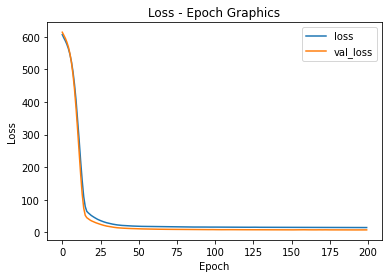

In [24]:
plt.plot(trainedRN.history['loss'], label='loss')
plt.plot(trainedRN.history['val_loss'], label='val_loss')
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])
plt.legend(['Loss'])
plt.legend();

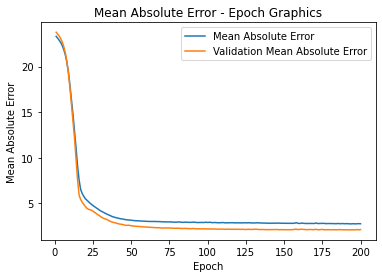

In [25]:
plt.title('Mean Absolute Error - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(trainedRN.history['mae']) + 1), trainedRN.history['mae'])
plt.plot(range(1, len(trainedRN.history['val_mae']) + 1), trainedRN.history['val_mae'])
plt.legend(['Mean Absolute Error'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

In [39]:
#dúvida sobre o gráfico de regressão